<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/beginner/workshop3/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import necessary libaries, then execute the import statement

Dataframe

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop3/data/student_scores.csv")#imports the CSV dataframe using pandas
df.shape # shows the dimension of our dataframe, 25 rows and 2 columns

(25, 2)

In [3]:
df.head() #the head() will print out the top five rows from the dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe() #show the statistical details of the dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


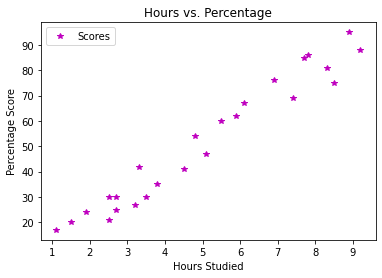

In [5]:
#plot the data points on 2-D graph
df.plot(x="Hours", y="Scores", style='*', color='m') #m - magenta
plt.title('Hours vs. Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show() #there is a positive linear relatino between studied and percentage of score

Preparing the Data

--> Next step is to divide the data into "attributes" and "labels".

-->attributes are the independent variables while labels are dependent variables whose values are to be predicted. 

--> In our dataframe we only have two columns and we want to predict the percentage score depending upon the hours studied. 

--> Therefore, the attribute set will consist of the "Hours" column, and the label will be the "Score" column

In [6]:
#The following code will extract the attributes and labels
X = df.iloc[:,:-1].values #attributes
  #specify "-1" as the range of columns since we want out attribute se to contain all the clomns except the last one, which is scores
y = df.iloc[:, 1].values  #labels
  #specify "1" for the label column since the index of scores column is 1
  #remember, the column indexes start with 0, and 1 will be the second column. 

In [7]:
#Now that we have our attributes and labels, the enxsr step is to split this data into traininng and test sets.
#We'll do this by using the scikit-learn build-in train test split() method
#Introduce scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  #split 80% of the data to training set while 20% of the data to test set. the porportion can also be 70% for the trainning set and the rest of 30 to the test set

Scikit-Learn: 

-> straight forward to implement linear regression models

-> what you need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data.

Training the Algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We mentioned that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fit the data. 

In [9]:
#to see the intercept
print(regressor.intercept_) #should be approx 2.01816004143

2.018160041434662


In [10]:
#to see the slow (coefficient of x)
print(regressor.coef_) #should be approx 9.91065648

[9.91065648]


Making Predictions

-> use our test data and see how accurately out algorithms predicts the percentage score

In [11]:
y_pred = regressor.predict(X_test)
#y_pred is a numpy array that contains all the predicted values for the input values in the X_test series

In [12]:
#to compare the actual output values for X_test with the predicted values, we do
df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df
#the model is not very precise, but the predicted percentages are close to the actual ones

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a particular dataset. For regression algorithms, we commonly use three evaluation metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error. We don't have to perform these calculation matually since the scikit-larn library comes with pre-built functions that can be used to determine these values for us

In [13]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373


Multiple Linear Regression

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import necessary libaries, then execute the import statement

In [15]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop3/data/petrol_consumption.csv')

In [16]:
#just like last time, run it to see it works
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Logistic Regression

### Univariate Logistic Regression

In [17]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop3/data/admissions1.csv")
df.head()
# take a look at data, explain what 0 and 1 mean ("positive class", "negative class")
# gmat is a test used for graduate program admissions

,gmat,admitted
0,780,1
1,750,1
2,690,0
3,710,1
4,680,0


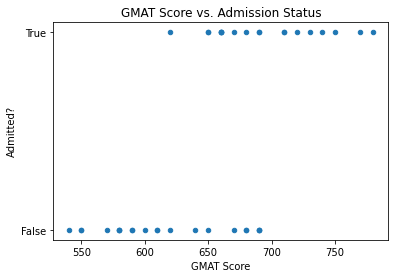

In [18]:
# plot data
df.plot(x="gmat", y="admitted", kind="scatter")
plt.title("GMAT Score vs. Admission Status")
plt.xlabel("GMAT Score")
plt.ylabel("Admitted?")
plt.yticks([0, 1], ["False", "True"])
plt.show()

In [19]:
# separate data into independent (X) and dependent variables (y)
X = df[["gmat"]]
y = df["admitted"]

In [20]:
from sklearn.linear_model import LogisticRegression
# split data between training and testing data, test_size means 20% test data (80% train data), random_state generates a specific random arrangement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
y_train   # also show y_test

18    0
29    1
27    0
35    0
37    0
2     0
39    1
30    0
34    1
16    0
36    0
8     1
13    0
5     1
17    1
14    1
33    1
7     1
32    1
1     1
26    1
12    1
31    0
24    0
6     0
23    0
21    0
19    0
9     0
38    0
3     1
0     1
Name: admitted, dtype: int64

In [22]:
regressor = LogisticRegression()    # create model
regressor.fit(X_train, y_train)     # train model
y_pred = regressor.predict(X_test)  # test model

In [23]:
# check accuracy of model
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])   # shows which was predicted correctly/incorrectly; will cover later
confusion_matrix

Predicted,0,1
Actual,,
0,3,1
1,2,2


In [24]:
metrics.accuracy_score(y_test, y_pred)      # show's accuracy of model as %; this isn't great... data is sparratic 

0.625

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'False'), Text(0, 0, 'True')]

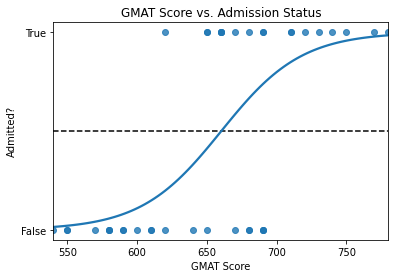

In [25]:
# plot model on data
import seaborn as sns
fig, ax = plt.subplots()
sns.regplot(x="gmat", y="admitted", data=df, logistic=True, ci=None, ax=ax)
ax.hlines(0.5, df.gmat.min(), df.gmat.max(), ls="dashed")
ax.set_title("GMAT Score vs. Admission Status")
ax.set_xlabel("GMAT Score")
ax.set_ylabel("Admitted?")
ax.set_yticks([0, 1])
ax.set_yticklabels(["False", "True"])

### Multivariate Logistic Regression

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop3/data/admissions2.csv")
df.head()

,gmat,gpa,admitted
0,780,4.0,1
1,750,3.9,1
2,690,3.3,0
3,710,3.7,1
4,680,3.9,0


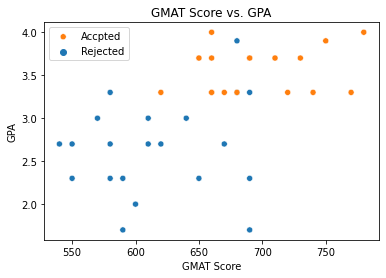

In [27]:
# plot data
fig, ax = plt.subplots()
sns.scatterplot(x=df.gmat, y=df.gpa, hue=df.admitted, ax=ax)
ax.set_title("GMAT Score vs. GPA")
ax.set_xlabel("GMAT Score")
ax.set_ylabel("GPA")
ax.legend(["Accpted", "Rejected"])
# show where decision boundary would be

In [28]:
X = df[["gmat", "gpa"]]
y = df["admitted"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,3,1
1,1,3


In [32]:
metrics.accuracy_score(y_test, y_pred)      # accuracy increases when more features are used

0.75

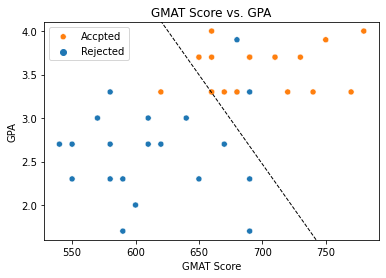

In [33]:
# plot data
fig, ax = plt.subplots()
sns.scatterplot(x=df.gmat, y=df.gpa, hue=df.admitted, ax=ax)
ax.set_title("GMAT Score vs. GPA")
ax.set_xlabel("GMAT Score")
ax.set_ylabel("GPA")
ax.legend(["Accpted", "Rejected"])

# plot decision boundary
b = regressor.intercept_[0]
w1, w2 = regressor.coef_.T
c = -b/w2
m = -w1/w2
xd = np.array([df.gmat.min(), df.gmat.max()])
ax.set_ylim(bottom=df.gpa.min() - 0.1, top=df.gpa.max() + 0.1)
yd = m*xd + c
ax.plot(xd, yd, 'k', lw=1, ls="--")

### Multiclass Logistic Regression

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop3/data/iris.csv")
df.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Petal Width')

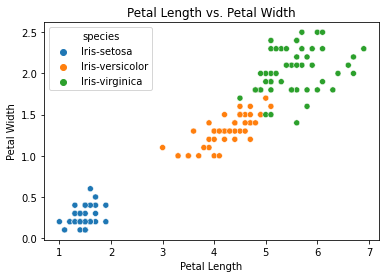

In [35]:
# plot data
fig, ax = plt.subplots()
sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.species, ax=ax)
ax.set_title("Petal Length vs. Petal Width")
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
# show where both decision boundareis will be

In [36]:
# change species names to integers, model requires numbers for mathematical functions
df["species"] = df["species"].astype("category").cat.codes
df.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [37]:
X = df[["petal_length", "petal_width"]]
y = df["species"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [39]:
regressor = LogisticRegression(multi_class="ovr")   # OVR - One vs. Rest
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [40]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix
# it would make sense that it has a hard time differing between 2 and 1, they are close together (look at graph)

Predicted,0,1,2
Actual,,,
0,7,0,0
1,0,10,2
2,0,0,11


In [41]:
metrics.accuracy_score(y_test, y_pred)      # accuracy increases when more features are used

0.9333333333333333

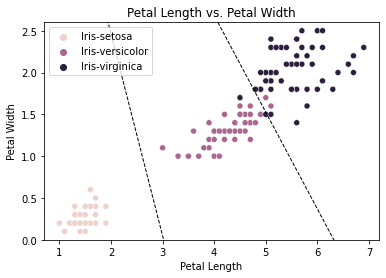

In [42]:
# plot data
fig, ax = plt.subplots()
sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.species, ax=ax)
ax.set_title("Petal Length vs. Petal Width")
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
handles, labels = ax.get_legend_handles_labels()
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
ax.legend(handles, labels)

# plot decision boundaries
for i in (0, 2):
    b = regressor.intercept_[i]
    w1, w2 = regressor.coef_[i].T

    c = -b/w2
    m = -w1/w2

    xd = np.array([df.petal_length.min(), df.petal_length.max()])
    ax.set_ylim(bottom=0, top=df.petal_width.max() + 0.1)
    yd = m*xd + c
    ax.plot(xd, yd, 'k', lw=1, ls="--")